In [7]:
### Get comments by using Facebook API ###
import facebook
import requests

### Cleaning the comments using nltk ###
import re
import nltk
#nltk.download('stopwords') # Uncomment to download stopwords
from nltk.corpus import stopwords
from nltk.stem.snowball import SpanishStemmer

### Create Bag of Words model ###
from sklearn.feature_extraction.text import CountVectorizer


def get_facebook_comments(news_id):
    comments = get_comments(news_id)
    corpus = clean_comments(comments)
    words = bag_of_words(corpus, max_features = 10)
    return [comments, corpus, words]


def get_comments(news_id):
    # Facebook Access Token: https://developers.facebook.com/tools/explorer/
    access_token = 'EAACEdEose0cBABjilDM2x7Sv3050ZBiLxZBz64nyzm8pShZBkal9Hnb9IHe8INum9zMHIziWxWXSbcpP8Ezb6ZCd03UCQZAqPzc9XmapZAh0ZBVq23K7lFOvbhhRSrjFQZCs0wptCwTUVPNKqaWBWbNepNqGzIVwLMGdPReiXZAMrMHa8TcZAwPOKSpv1jmHweUZAC448j6j7tWhAZDZD'

    user = '/me'
    graph = facebook.GraphAPI(access_token)
    profile = graph.get_object(user)

    # Testing with Prensa Libre's posts
    posts = graph.get_connections(id =news_id, connection_name='comments')
 
    comments = []
    while True:
        try:
            for post in posts['data']:
                comments.append(post['message'])
            posts = requests.get(posts['paging']['next']).json()
        except KeyError:
            break
    
    return comments


def clean_comments(comments):
    corpus = []
    for i in range(0,len(comments)):
        review = re.sub('[^a-zA-Z]', ' ', comments[i])
        review = review.lower()
        review = review.split()
        stemmer = SpanishStemmer()
        review = [stemmer.stem(word) for word in review if not word in set(stopwords.words('spanish'))]
        review = ' '.join(review)
        corpus.append(review)
        
    return corpus


def bag_of_words(corpus, max_features = 5):
    cv = CountVectorizer(max_features = max_features)
    X = cv.fit_transform(corpus).toarray()
    return cv.get_feature_names() 


### Auxiliary functions for plotting ###
def dispersion_plot(corpus, words):
    tokens = []
    for word in corpus:
        tokens = tokens + nltk.word_tokenize(word)
    text = nltk.Text(tokens)
    text.dispersion_plot(words)
    return

def frequency_plot(corpus, words):
    tokens = []
    for word in corpus:
        tokens = tokens + nltk.word_tokenize(word)
    text = nltk.Text(tokens)
    fd = nltk.FreqDist(text)
    fd.plot(50,cumulative=False)
    return

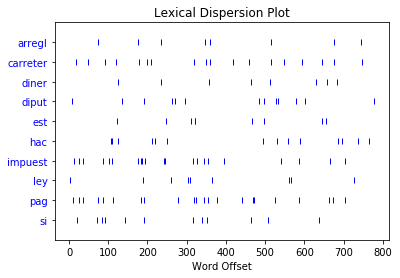

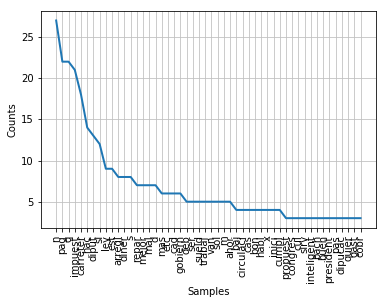

In [8]:
[comments, corpus, words] = get_facebook_comments('345419408148_10155480254368149')
#print(len(comments))

dispersion_plot(corpus, words)
frequency_plot(corpus, words)